In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def get_angles(pos, i, d_model):
    '''
    2 * (i//2) -->make both 2*i and 2 * i + 1 into 2 *i
    so dimen list change from 
    [0,1,2,3,4,5,6,7,8...]
    into
    [0,0,2,2,4,4,6,6,8...]
    then after rate_lization
    odd idx value func sin
    even idx value func cos
    
    '''
    angle_rates = 1/np.power(10000,(2*(i // 2 )/np.float32(d_model)))
    print('angle_rates size:',angle_rates.shape)
    return pos * angle_rates

def postional_encode(position, d_model):
    angle_rads = get_angles(np.arange(position)[:,np.newaxis],
                           np.arange(d_model)[np.newaxis,:],
                           d_model)
    para1 = np.arange(position)[:,np.newaxis]
    para2 = np.arange(d_model)[np.newaxis,:]
    print(para1[:10], ' shape= ', para1.shape)
    print(para2[:10], ' shape= ', para2.shape)
    print('angle_rads shape:', angle_rads.shape)
    print('original :', angle_rads[1:2], ' ', angle_rads[1:2].shape)

    angle_rads[:,0::2] = np.sin(angle_rads[:,0::2])
    angle_rads[:,1::2] = np.cos(angle_rads[:,1::2])
    print('odd ones:',angle_rads[1:2,0::2], ' ', angle_rads[1:2,0::2].shape)
    print('even ones:', angle_rads[1:2,1::2], ' ', angle_rads[1:2,1::2].shape)
    # print()
    
    pos_encoding = angle_rads[np.newaxis,:]

    return pos_encoding

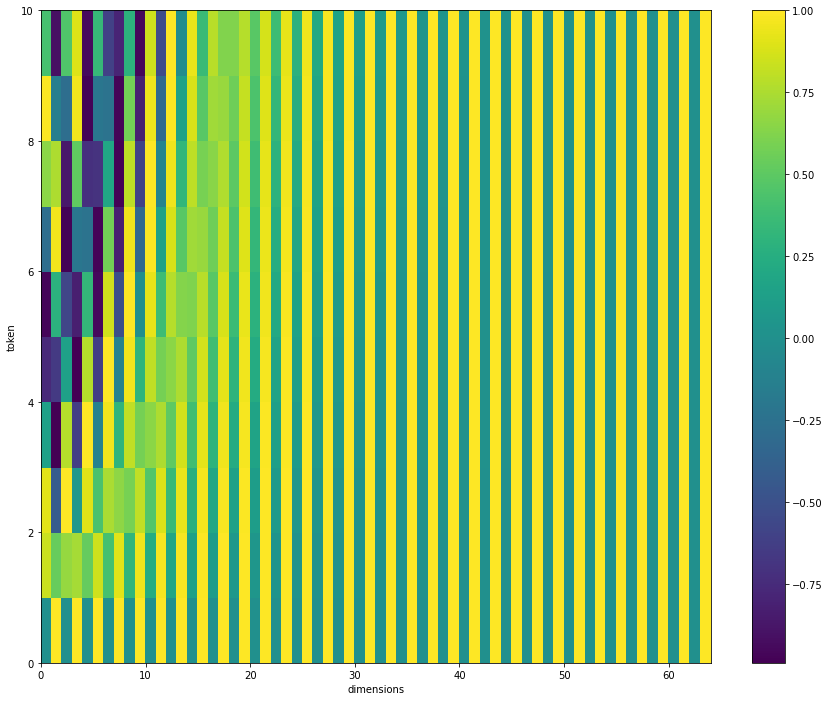

In [17]:
token = 10
dim = 64
pos_encoding = postional_encode(token, dim)
plt.figure(figsize=(15,12))
plt.pcolormesh(pos_encoding[0],cmap="viridis")
plt.xlabel('dimensions')
plt.ylabel('token')
plt.xlim((0,dim))
plt.ylim((0,token))
plt.colorbar()
plt.show()

angle_rates size: (1, 64)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]  shape=  (10, 1)
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]]  shape=  (1, 64)
angle_rads shape: (10, 64)
original : [[1.00000000e+00 1.00000000e+00 7.49894209e-01 7.49894209e-01
  5.62341325e-01 5.62341325e-01 4.21696503e-01 4.21696503e-01
  3.16227766e-01 3.16227766e-01 2.37137371e-01 2.37137371e-01
  1.77827941e-01 1.77827941e-01 1.33352143e-01 1.33352143e-01
  1.00000000e-01 1.00000000e-01 7.49894209e-02 7.49894209e-02
  5.62341325e-02 5.62341325e-02 4.21696503e-02 4.21696503e-02
  3.16227766e-02 3.16227766e-02 2.37137371e-02 2.37137371e-02
  1.77827941e-02 1.77827941e-02 1.33352143e-02 1.33352143e-02
  1.00000000e-02 1.00000000e-02 7.49894209e-03 7.49894209e-03
  5.62341325e-03 5.62341325e-03 4.21696503e-03 4.21696503e-03
  3.16227766e-03 3.16227766e-03

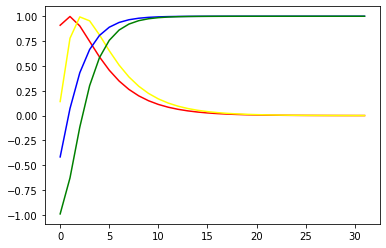

In [12]:
import matplotlib.pyplot as plt
import numpy as np
token = 10
dim = 64
pos_encoding = postional_encode(token, dim)
idx = np.arange(32)[np.newaxis,:]
print(idx)
print(pos_encoding[0][1:2,0::2])
fig,ax = plt.subplots()
ax.plot(idx[0],pos_encoding[0][2:3,0::2][0],color='red',)
ax.plot(idx[0],pos_encoding[0][3:4,0::2][0],color='yellow',)
ax.plot(idx[0],pos_encoding[0][2:3,1::2][0],color='blue')
ax.plot(idx[0],pos_encoding[0][3:4,1::2][0],color='green',)
plt.show()


In [36]:
a = np.arange(10)[:,np.newaxis]
b = np.arange(10)[np.newaxis,:]
a*b

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [37]:
7.49894209e-01

0.749894209